In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle

In [3]:
from resonator_tools.circuit import notch_port

In [6]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Resonators Al/6_Al_bad_xmon_resonators_on_power.pkl", "rb") as f:
    scan_areas, powers, power_scans = pickle.load(f)

In [4]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Resonators Nb/6_Nb_xmon_resonators_on_power_more_averaging.pkl", "rb") as f:
    scan_areas, powers, power_scans = pickle.load(f)

In [6]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Resonators NbN/6_NbN_300nm_xmon_resonators_on_power.pkl", "rb") as f:
    scan_areas, powers, power_scans = pickle.load(f)

In [4]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Resonators NbN/6_NbN_300nm_chngn_wdth_xmon_resonators_on_power.pkl", "rb") as f:
    scan_areas, powers, power_scans = pickle.load(f)

In [5]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Resonators NbN/6_NbN_40nm_xmon_resonators_on_power.pkl", "rb") as f:
    scan_areas, powers, power_scans = pickle.load(f)

In [5]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Resonators Al/xmon_first_try_resonators_on_power.pkl", "rb") as f:
    scan_areas, powers, power_scans = pickle.load(f)

In [7]:
power = 0
scan = scan_areas[0]

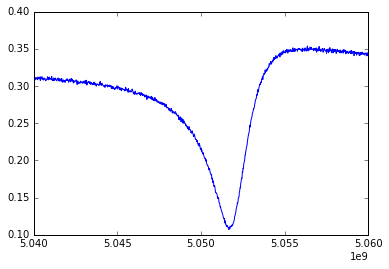

In [8]:
freqs, S21s = power_scans[scan][power][0], power_scans[scan][power][1]
plt.plot(freqs, abs(S21s))

In [9]:
resonators_data = []
sim_S21s = []
for scan in scan_areas[1:]:
    Qls = []
    Qis = []
    Qes = []
    frs = []
    for power in range(len(powers)):
        freqs, S21s = power_scans[scan][power][0], power_scans[scan][power][1]
        np = notch_port(freqs, S21s)
        np.autofit()
        if (np.fitresults["Qi_dia_corr"]<10e5 and np.fitresults["Qi_dia_corr"]>10e2) or len(Qls)==0:
            Qls.append(np.fitresults["Ql"])
            Qes.append(np.fitresults["Qc_dia_corr"])
            Qis.append(np.fitresults["Qi_dia_corr"])
        else:
            Qls.append(Qls[-1])
            Qes.append(Qes[-1])
            Qis.append(Qis[-1])
            frs.append(frs[-1])
            continue
        if abs(np.fitresults["fr"]) <1e10 or len(frs)==0:
            frs.append(np.fitresults["fr"])
        else:
            frs.append(frs[-1])
    resonators_data.append((Qls, Qis, Qes, frs))
    sim_S21s.append(np.z_data_sim)

/home/gleb/.ENV/lib/python3.4/site-packages/resonator_tools-0.1-py3.4.egg/resonator_tools/circuit.py:195: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/gleb/.ENV/lib/python3.4/site-packages/resonator_tools-0.1-py3.4.egg/resonator_tools/circuit.py:199: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/gleb/.ENV/lib/python3.4/site-packages/resonator_tools-0.1-py3.4.egg/resonator_tools/circuit.py:294: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


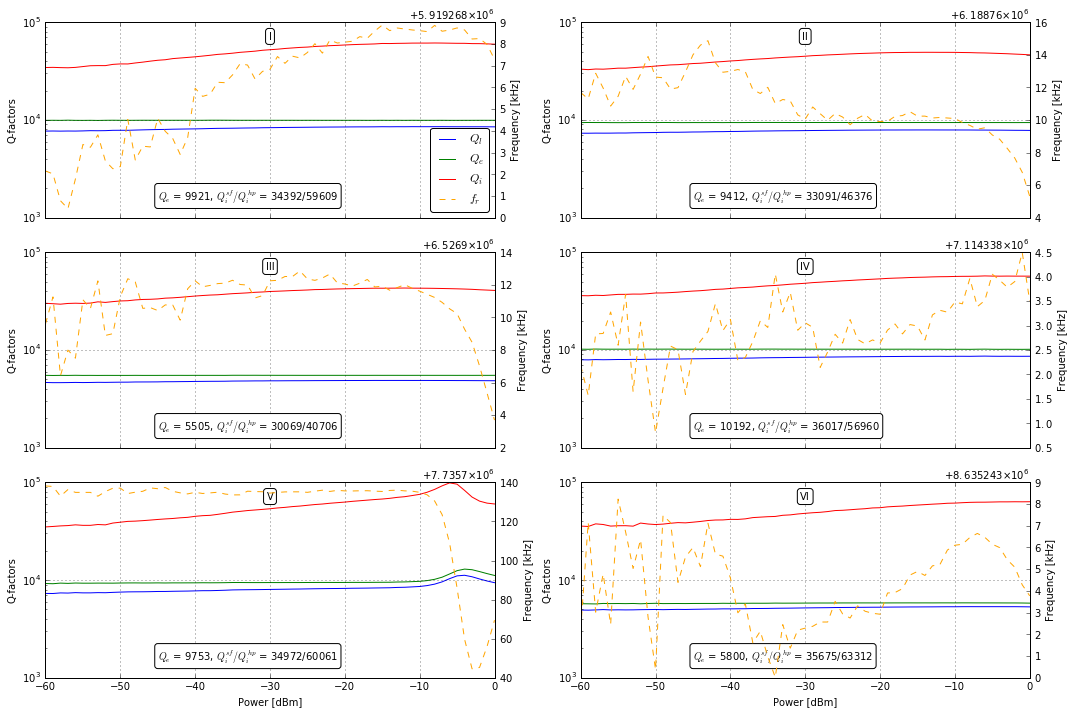

In [12]:
fig, axes = plt.subplots(3, 2, figsize = (15, 10), sharex = True)
greek_nums = ["I", "II", "III", "IV", "V", "VI", "VII"]
for idx, ax in list(enumerate(flatten(axes)))[:]:
    Qls, Qis, Qes, frs = resonators_data[idx]
    lns = ax.plot(powers, Qls, label = "$Q_l$")
    lns += ax.plot(powers, Qes, label = "$Q_e$")
    lns += ax.plot(powers, Qis, label = "$Q_i$")
#     spines(ax)

    ax.set_yscale("log")
    ax.set_ylabel("Q-factors")
    ax.set_ylim(1e3, 1e5)
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    
    ax.text(-30, ax.get_ylim()[1]/1.5, greek_nums[idx], bbox=props, horizontalalignment="center")
    ax.text(-45, ax.get_ylim()[0]*1.5, "$Q_e$ = %i"%mean(Qes)+
            ", $Q_i^{sf}/Q_i^{hp}$ = %i/%i"%(Qis[0], Qis[-1]), bbox=props)
    
    if idx>3:
        ax.set_xlabel("Power [dBm]")
    ax.grid()
    
    ax2 = ax.twinx()
#     spines(ax2)

    lns += ax2.plot(powers, array(frs)/1e3, "--", label = '$f_r$', color="orange")
    y_formatter = matplotlib.ticker.ScalarFormatter(useMathText=True)
    ax2.yaxis.set_major_formatter(y_formatter)
    ax2.set_ylabel("Frequency [kHz]")
#     ax2.yaxis.get_offset_text().set_y(1.5)

axes[0][0].legend(lns, [ln.get_label() for ln in lns], loc=4, framealpha=1, fancybox=True)
    
plt.tight_layout()
plt.savefig("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Pictures/q-factors-and-freqs_al_bad.pdf",
            bbox_inches="tight")

In [45]:
font = {"size":12}
matplotlib.rc("font", **font)

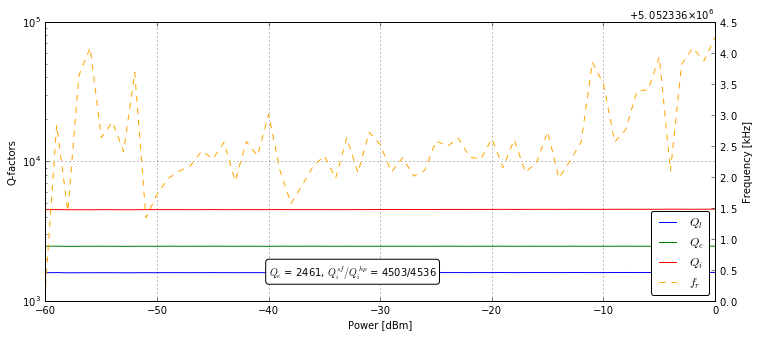

In [6]:
Qls, Qis, Qes, frs = resonators_data[0]
lns = plt.plot(powers, Qls, label = "$Q_l$")
lns += plt.plot(powers, Qes, label = "$Q_e$")
lns += plt.plot(powers, Qis, label = "$Q_i$")

plt.gca().set_yscale("log")
plt.gca().set_ylabel("Q-factors")
plt.gca().set_ylim(1e3, 1e5)
props = dict(boxstyle='round', facecolor='white', alpha=1)

plt.gca().text(-40, plt.gca().get_ylim()[0]*1.5, "$Q_e$ = %i"%mean(Qes)+
        ", $Q_i^{sf}/Q_i^{hp}$ = %i/%i"%(Qis[0], Qis[-1]), bbox=props)

plt.gca().set_xlabel("Power [dBm]")
plt.grid()

ax2 = plt.gca().twinx()
#     spines(ax2)

lns += ax2.plot(powers, array(frs)/1e3, "--", label = '$f_r$', color="orange")
y_formatter = matplotlib.ticker.ScalarFormatter(useMathText=True)
ax2.yaxis.set_major_formatter(y_formatter)
ax2.set_ylabel("Frequency [kHz]")
plt.gcf().set_size_inches(12,5)
plt.legend(lns, [ln.get_label() for ln in lns], loc=0, framealpha=1, fancybox=True)

plt.savefig("/home/gleb/Документы/Science/Reverse engineering of XMons/Resonators/Pictures/spurious_al.pdf",
            bbox_inches="tight")

In [53]:
power = 20
scan = scan_areas[1]
freqs, S21s = power_scans[scan][power][0], power_scans[scan][power][1]
np = notch_port(freqs, S21s)
np.autofit()

/home/gleb/.ENV/lib/python3.4/site-packages/resonator_tools-0.1-py3.4.egg/resonator_tools/circuit.py:195: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/gleb/.ENV/lib/python3.4/site-packages/resonator_tools-0.1-py3.4.egg/resonator_tools/circuit.py:199: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/gleb/.ENV/lib/python3.4/site-packages/resonator_tools-0.1-py3.4.egg/resonator_tools/circuit.py:294: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [42]:
np.fitresults

{'Qc_dia_corr': 15596.408151736494,
 'Qi_dia_corr': 30481.894494477398,
 'Qi_dia_corr_err': 939.83665301548581,
 'Qi_no_corr': 42734.030470262733,
 'Qi_no_corr_err': 1806.5035289600967,
 'Ql': 10317.395400264419,
 'Ql_err': 111.59567066229715,
 'absQc': 13601.161516505026,
 'absQc_err': 50.255098325209666,
 'chi_square': 0.00071058843189953345,
 'fr': 5315295661.2344532,
 'fr_err': 2685.4654790792579,
 'phi0': 0.51137974048406321,
 'phi0_err': 0.0099063413806078204,
 'theta0': -2.6302152263834642}

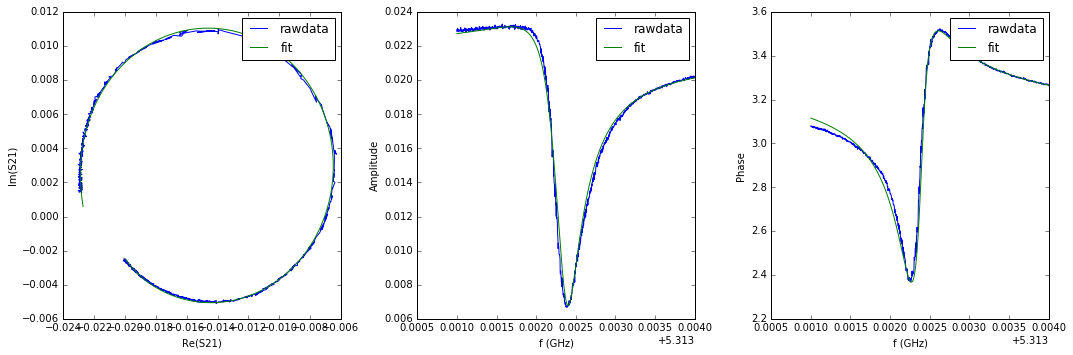

In [43]:
np.plotall()

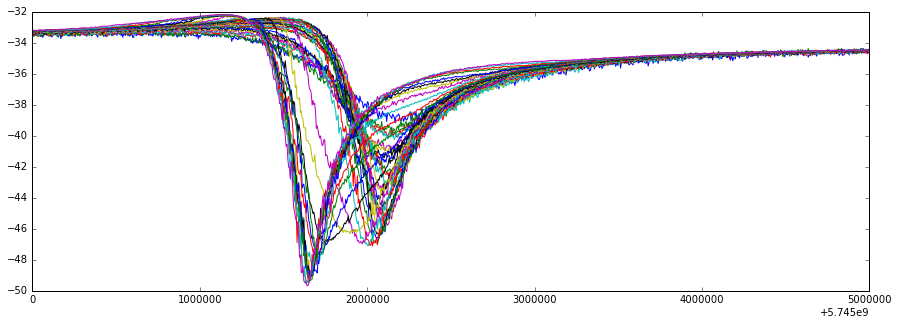

In [56]:
for power in range(0, 40):
    plt.plot(power_scans[scan][power][0], 20*log10(abs(power_scans[scan][power][1])))
plt.gcf().set_size_inches(15,5)